In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

tweets = pd.read_csv('csv/train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
tweets = tweets.fillna(value= 'Not Especified')

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
tweets['location'].value_counts()

Not Especified                           2533
USA                                       104
New York                                   71
United States                              50
London                                     45
                                         ... 
Washington, D.C.                            1
At Da Laundry Mat Wit Nivea                 1
Somewhere between Chicago & Milwaukee       1
The Meadow                                  1
Jersey City, New Jersey                     1
Name: location, Length: 3342, dtype: int64

In [5]:
tweets['text lenght'] = tweets['text'].str.len()

In [6]:
tweets_by_loc = tweets[['location', 'target', 'text lenght']]

#esta linea genera un warning (de lo que lei es un falso positivo por que al hacer asignaciones encadenadas puede que el resultado no sea el esperado pero este no es el caso), no se arreglarlo
tweets_by_loc['cuantity'] = 1

tweets_by_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     7613 non-null   object
 1   target       7613 non-null   int64 
 2   text lenght  7613 non-null   int64 
 3   cuantity     7613 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 238.0+ KB


/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
tweets_by_loc = tweets_by_loc.groupby('location').sum()

In [8]:
tweets_by_loc.sample(n=10)

,target,text lenght,cuantity
location,,,
texas a&m university,0,31,1
"Rock Springs, WY",1,144,1
??? ???? ??????,1,79,1
Mpela'zwe,0,146,1
"Winston-Salem, NC",1,291,3
Carregado,0,81,1
Not Steven Yeun / AMC.,0,128,1
956,0,75,1
Killafornia made me,1,63,1


In [9]:
tweets_by_loc = tweets_by_loc.sort_values('target', ascending=False)

In [10]:
tweets_by_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries, Not Especified to Rutherfordton, NC
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   target       3342 non-null   int64
 1   text lenght  3342 non-null   int64
 2   cuantity     3342 non-null   int64
dtypes: int64(3)
memory usage: 104.4+ KB


In [11]:
tweets_by_loc['Veracidad'] = tweets_by_loc['target'] / tweets_by_loc['cuantity']
tweets_by_loc.head(10)

,target,text lenght,cuantity,Veracidad
location,,,,
Not Especified,1075,249413,2533,0.424398
USA,67,11285,104,0.644231
United States,27,5001,50,0.540000
Nigeria,22,3360,28,0.785714
India,20,2470,24,0.833333
Mumbai,19,2740,22,0.863636
New York,16,9234,71,0.225352
London,16,4820,45,0.355556
UK,16,3133,27,0.592593


In [12]:
cuantity_mean = tweets_by_loc['cuantity'].mean()
has_more_tweets_than_cuantity_mean = (tweets_by_loc['cuantity'] > 10)
locations_with_more_than_10_tweets = tweets_by_loc[has_more_tweets_than_cuantity_mean]
del locations_with_more_than_10_tweets['target']
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('Veracidad', ascending =True)
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.reset_index()
locations_with_more_than_10_tweets.head(10)

,location,text lenght,cuantity,Veracidad
0,NYC,1406,12,0.166667
1,Everywhere,1335,15,0.200000
2,Florida,1540,14,0.214286
3,New York,9234,71,0.225352
4,Kenya,2635,20,0.250000
5,United Kingdom,1400,14,0.285714
6,"Los Angeles, CA",2969,26,0.307692
7,London,4820,45,0.355556
8,Seattle,1392,11,0.363636
9,Chicago,1229,11,0.363636


In [13]:
tweets_by_loc = tweets_by_loc.reset_index()
tweets_by_loc.head()

,location,target,text lenght,cuantity,Veracidad
0,Not Especified,1075,249413,2533,0.424398
1,USA,67,11285,104,0.644231
2,United States,27,5001,50,0.540000
3,Nigeria,22,3360,28,0.785714
4,India,20,2470,24,0.833333


In [14]:
locations_with_more_than_10_tweets['Veracidad'] = locations_with_more_than_10_tweets['Veracidad'] * 100

Text(0.5, 1.0, 'Porcentaje de Veracidad de Tweets por Locacion')

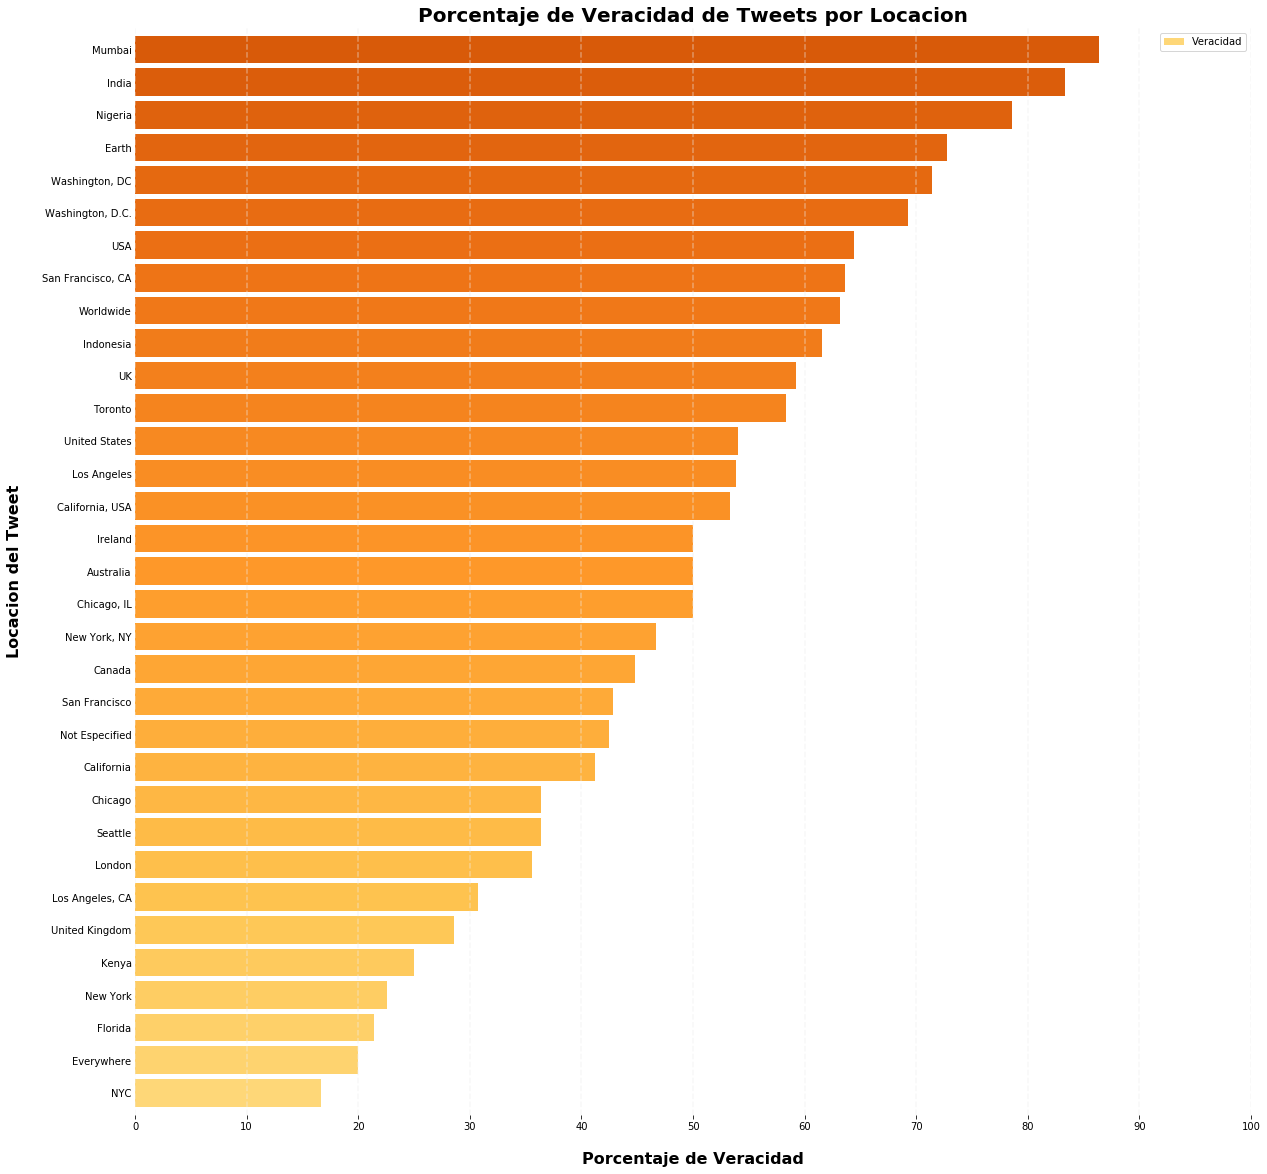

In [15]:

saltos = np.linspace(0.3, 0.7, 33)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.plot(kind='barh', y ='Veracidad', x = 'location', figsize=(20,20), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Porcentaje de Veracidad de Tweets por Locacion", weight='bold', size=20)


In [16]:
tweets_by_loc.head(10)

,location,target,text lenght,cuantity,Veracidad
0,Not Especified,1075,249413,2533,0.424398
1,USA,67,11285,104,0.644231
2,United States,27,5001,50,0.540000
3,Nigeria,22,3360,28,0.785714
4,India,20,2470,24,0.833333
5,Mumbai,19,2740,22,0.863636
6,New York,16,9234,71,0.225352
7,London,16,4820,45,0.355556
8,UK,16,3133,27,0.592593
9,"Washington, DC",15,2430,21,0.714286


In [17]:
top_10_tweets_by_loc = (tweets_by_loc.loc[:,'target'] >= 15)
top_10 = tweets_by_loc.loc[top_10_tweets_by_loc]
top_10.head(15)

,location,target,text lenght,cuantity,Veracidad
0,Not Especified,1075,249413,2533,0.424398
1,USA,67,11285,104,0.644231
2,United States,27,5001,50,0.540000
3,Nigeria,22,3360,28,0.785714
4,India,20,2470,24,0.833333
5,Mumbai,19,2740,22,0.863636
6,New York,16,9234,71,0.225352
7,London,16,4820,45,0.355556
8,UK,16,3133,27,0.592593
9,"Washington, DC",15,2430,21,0.714286


Text(0.5, 1.0, 'Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos')

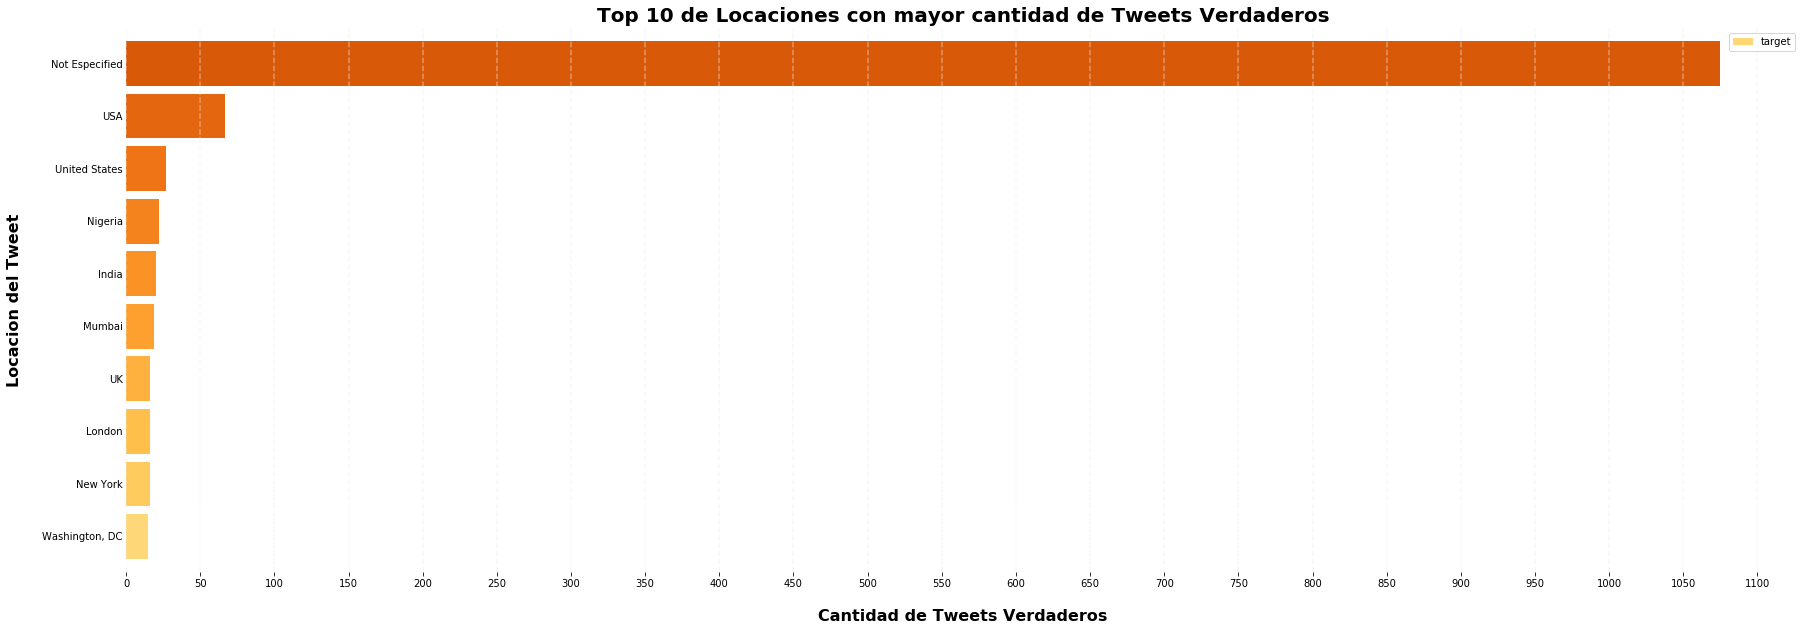

In [18]:
saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top_10 = top_10.sort_values('target')
top10_plot = top_10.plot(kind='barh', y ='target', x = 'location', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 1101, 50.0))
plt.tick_params(axis='y', length=0)

top10_plot.spines['right'].set_visible(False)
top10_plot.spines['top'].set_visible(False)
top10_plot.spines['left'].set_visible(False)
top10_plot.spines['bottom'].set_visible(False)

lineas = top10_plot.get_xticks()
for i in lineas:
      top10_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top10_plot.set_xlabel("Cantidad de Tweets Verdaderos", labelpad=20, weight='bold', size=16)
top10_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
top10_plot.set_title("Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos", weight='bold', size=20)


In [26]:
locations_with_more_than_10_tweets['text lenght mean'] = locations_with_more_than_10_tweets['text lenght'] / locations_with_more_than_10_tweets['cuantity']
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('text lenght mean')
locations_with_more_than_10_tweets.head()

,location,text lenght,cuantity,Veracidad,text lenght mean
1,Everywhere,1335,15,20.000000,89.000000
25,"San Francisco, CA",994,11,63.636364,90.363636
11,Not Especified,249413,2533,42.439795,98.465456
23,Indonesia,1292,13,61.538462,99.384615
5,United Kingdom,1400,14,28.571429,100.000000


Text(0.5, 1.0, 'Porcentaje de Veracidad de Tweets por Locacion')

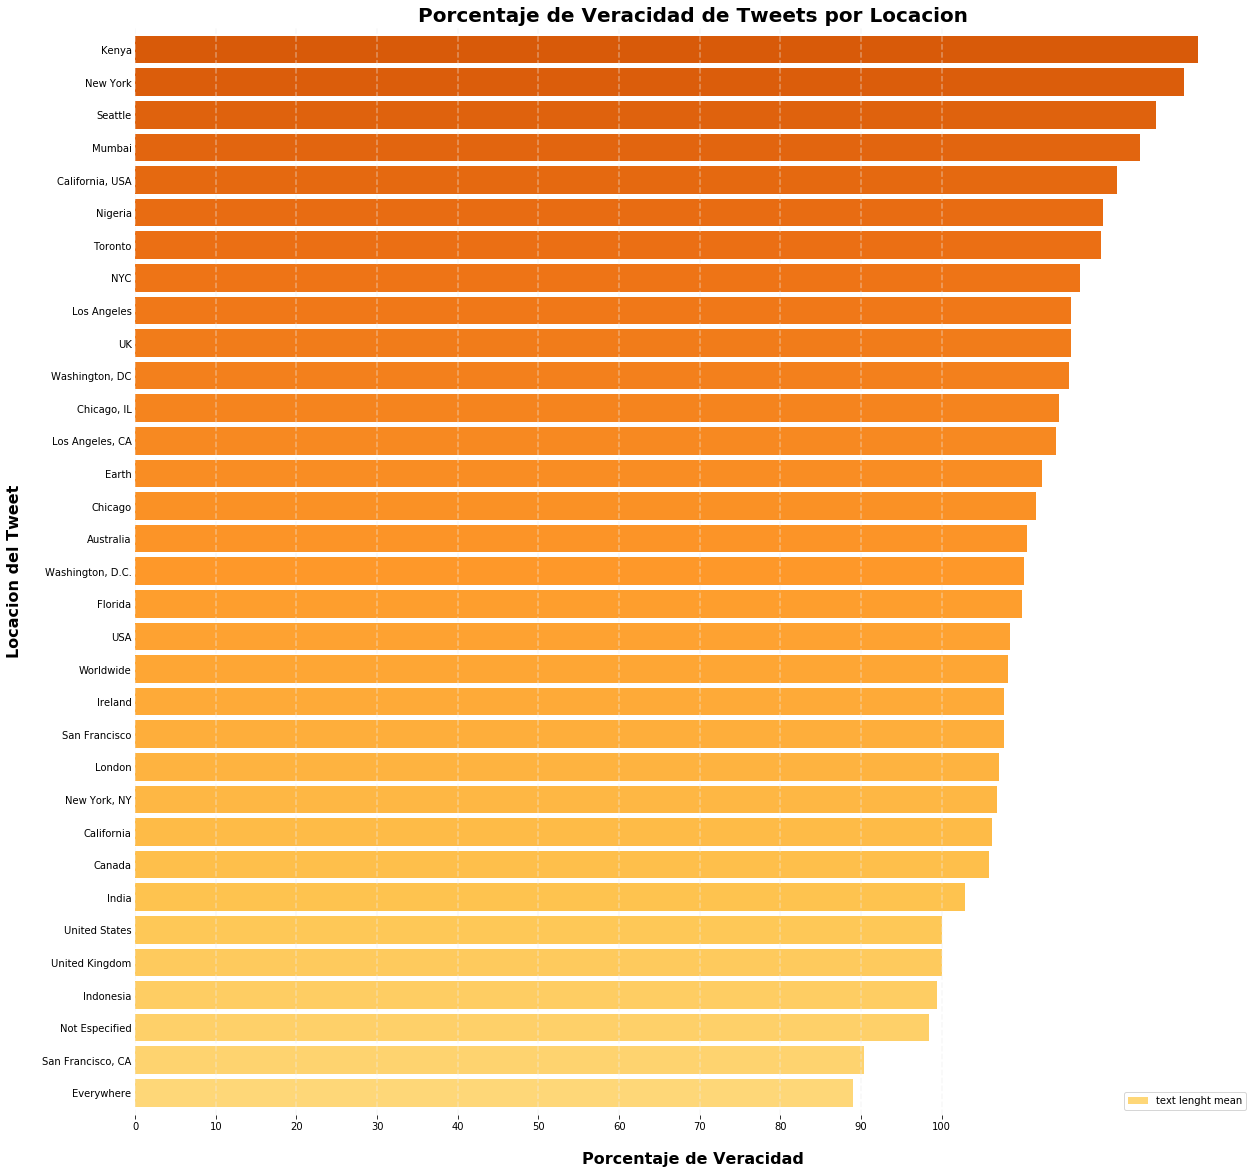

In [27]:
saltos = np.linspace(0.3, 0.7, 33)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.plot(kind='barh', y ='text lenght mean', x = 'location', figsize=(20,20), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Longitud de Tweets Por Locacion ", weight='bold', size=20)